In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.plot import plot_correlation_matrix, plot_missing_value

# Import Datasets

In [2]:
df = pd.read_csv("datasets/train.csv", index_col="Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 80)

# Simple EDA
### Check Missing Value

,missing_value,%
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


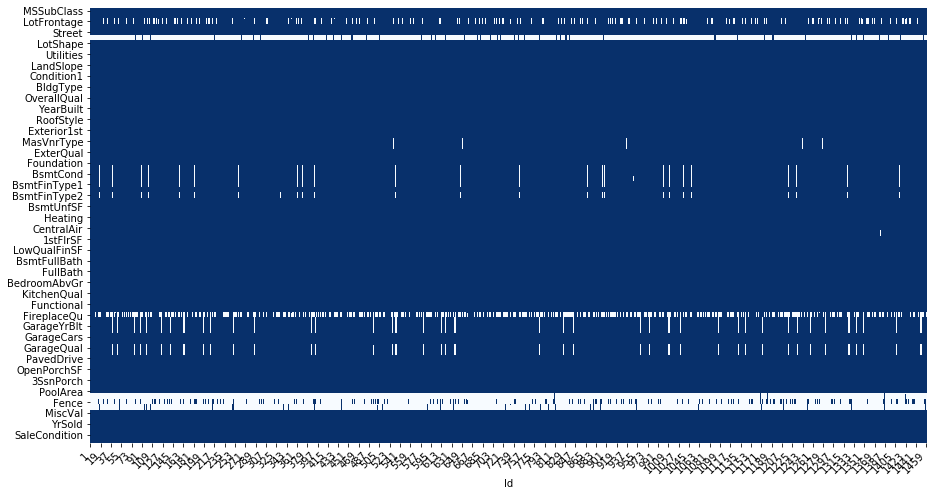

In [4]:
plot_missing_value(df, return_df=True).sort_values("missing_value", ascending=False).head(20)

### Delete some columns which have missing value

In [5]:
df.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "LotFrontage"], inplace=True)
df.shape

(1460, 74)

### Let's see the target value -  SalePrice

In [6]:
df['SalePrice'].isna().sum()

0

### SalePrice Histogram

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


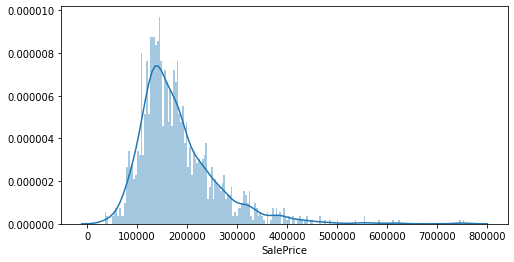

In [7]:
print(df["SalePrice"].describe())
plt.figure(figsize=(8, 4))
ax = sns.distplot(df["SalePrice"], bins=200)

In [8]:
filt = df["SalePrice"] < 400000
df = df.loc[filt]
df.shape

(1432, 74)

count      1432.000000
mean     174873.438547
std       65922.703937
min       34900.000000
25%      129500.000000
50%      160600.000000
75%      209050.000000
max      395192.000000
Name: SalePrice, dtype: float64


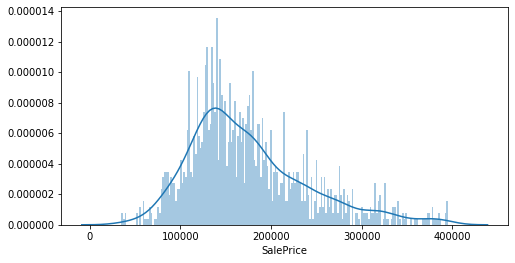

In [9]:
# New Histogram
print(df["SalePrice"].describe())
plt.figure(figsize=(8, 4))
ax = sns.distplot(df["SalePrice"], bins=200)

### PLot Correlation Matrix

In [10]:
plot_correlation_matrix(df, "SalePrice")

interactive(children=(ToggleButtons(description='method', options=('spearman', 'kendall', 'pearson', 'pearson_…

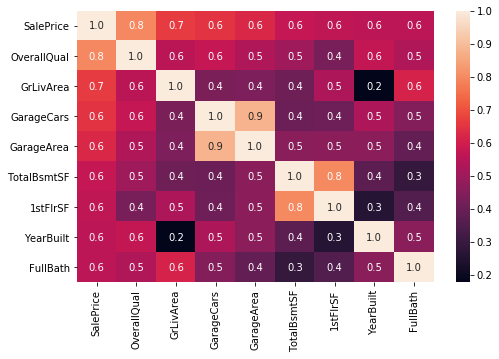

In [11]:
correlation = df.corr()
n = 9
cols = correlation.nlargest(n, 'SalePrice')['SalePrice'].index
df_cor = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(8, 5))
ax = sns.heatmap(df_cor, cbar=True, annot=True, fmt='.1f', yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [12]:
df_new = df[["YearBuilt", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "SalePrice"]]

### Pair Plot

In [13]:
df_new.head(3)

,YearBuilt,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,SalePrice
Id,,,,,,,,,
1,2003,7,1710,2,548,856,856,2,208500
2,1976,6,1262,2,460,1262,1262,2,181500
3,2001,7,1786,2,608,920,920,2,223500


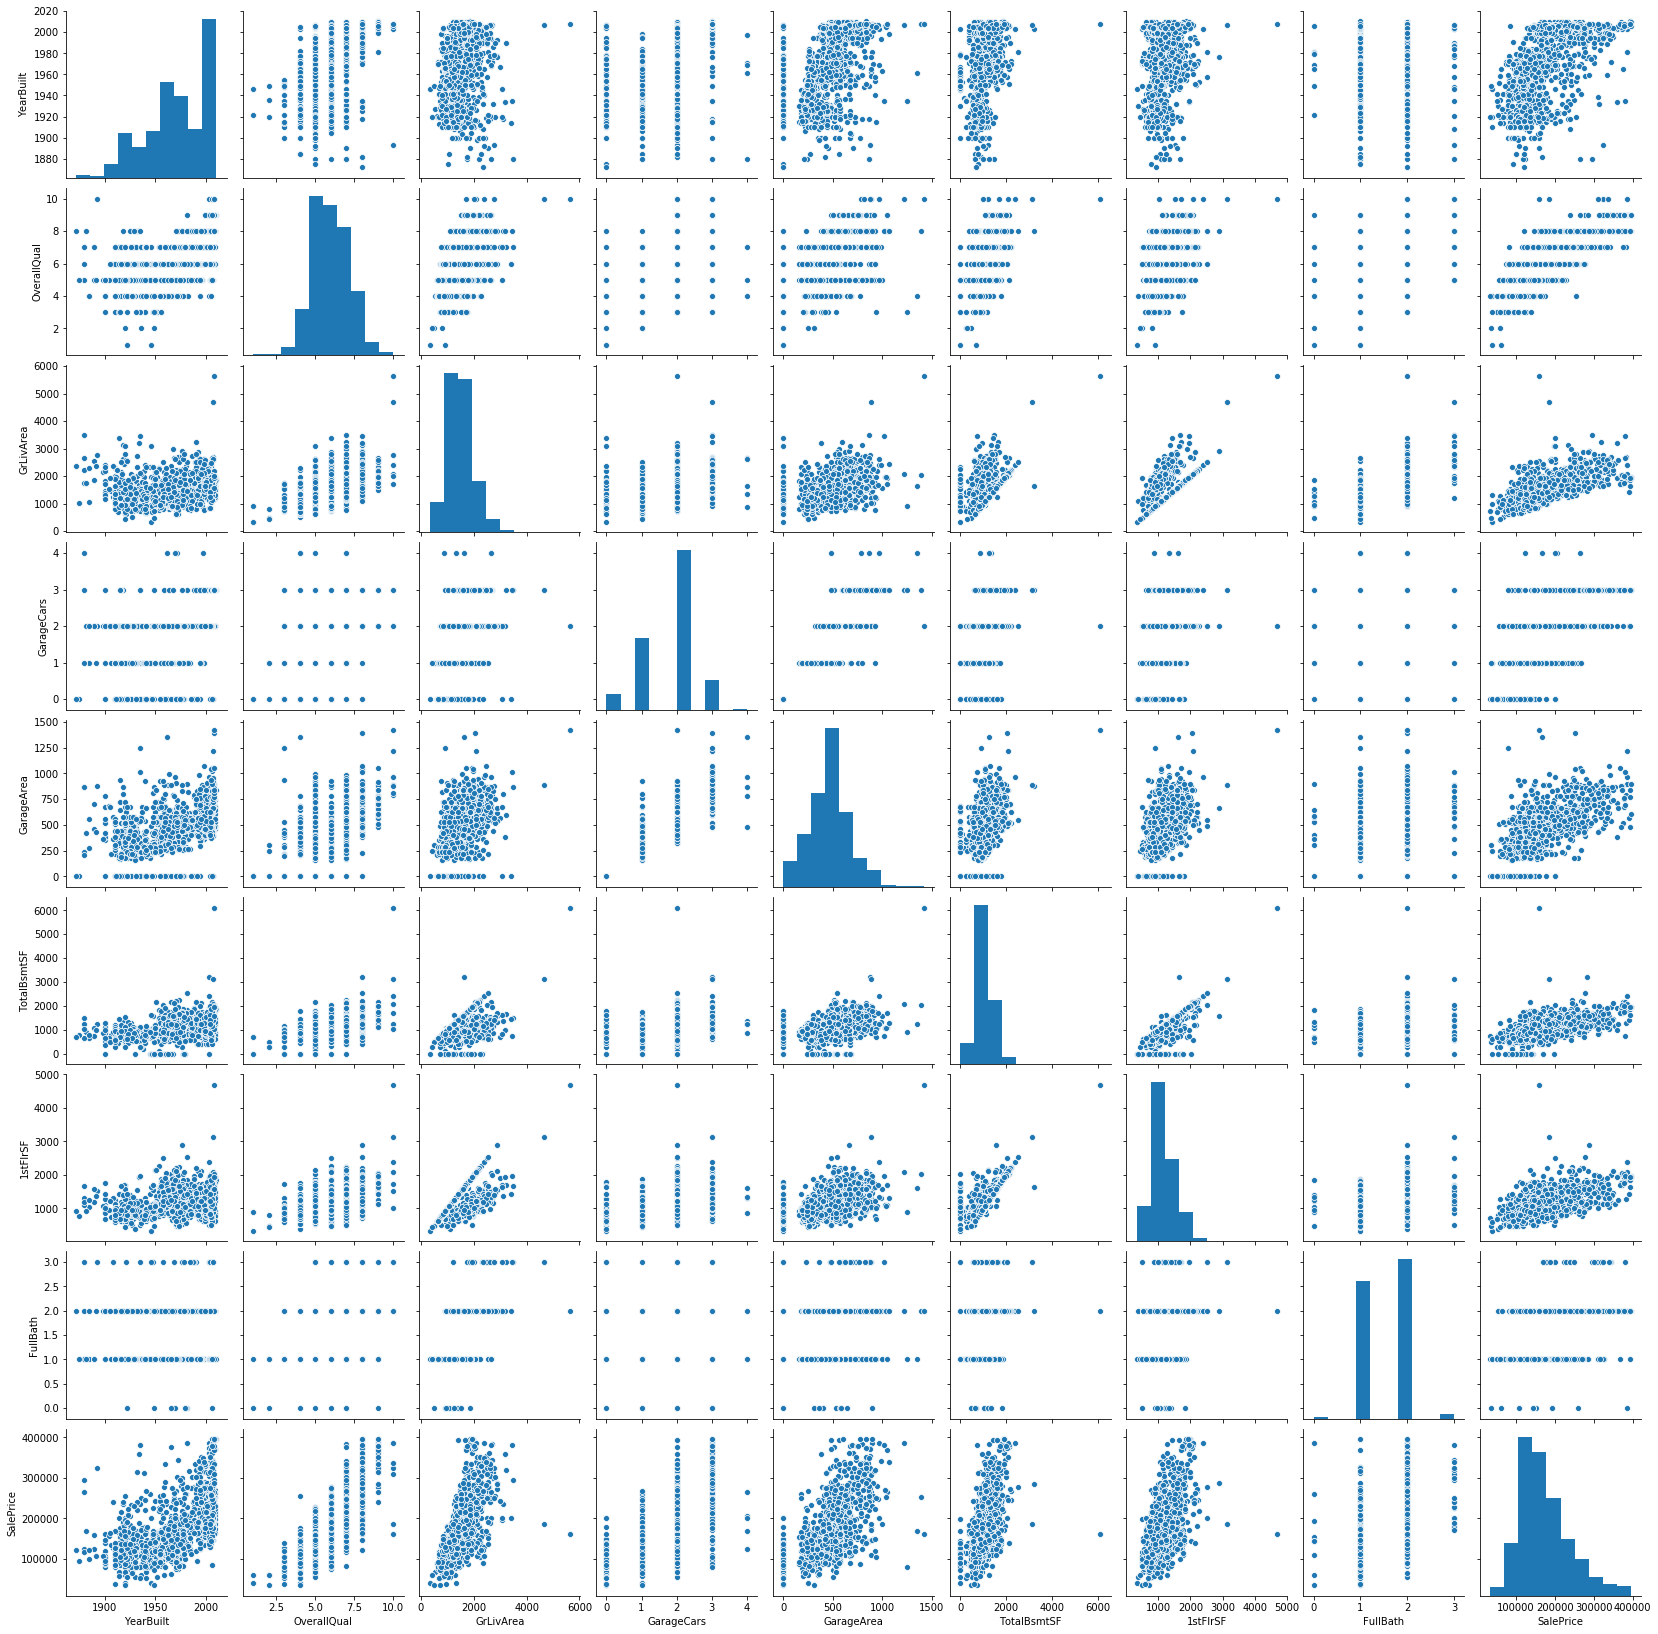

In [14]:
sns.pairplot(df_new)

### Numeric Columns

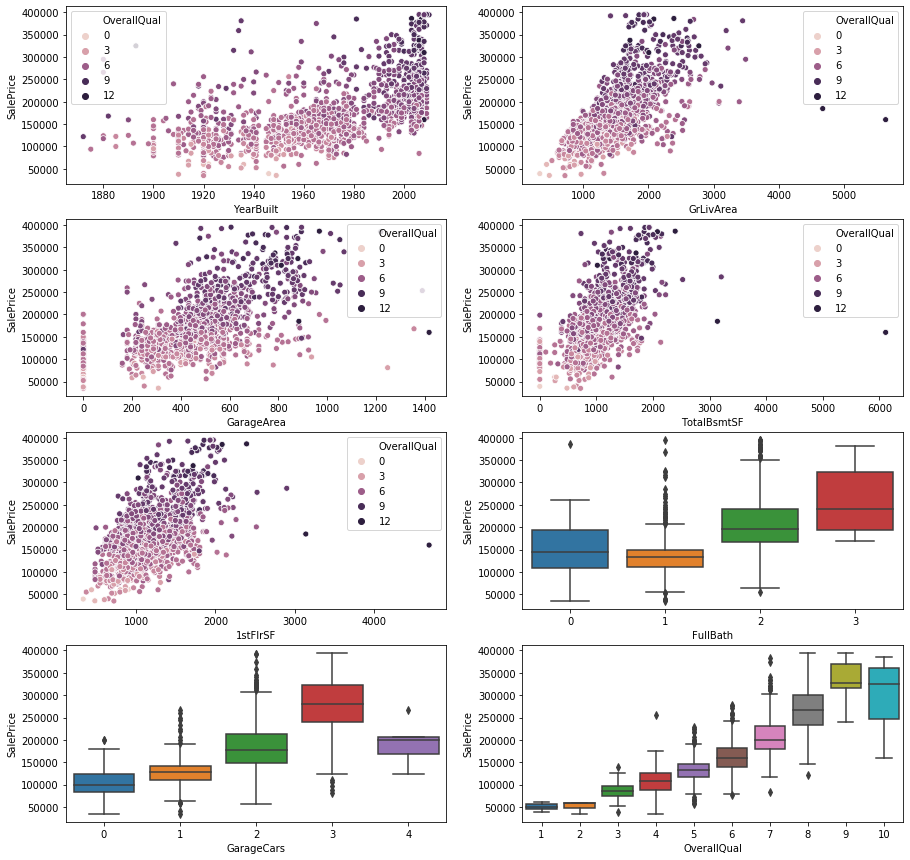

In [15]:
f, axes = plt.subplots(4, 2, figsize=(15, 15), sharex=False)
ax = sns.scatterplot(x="YearBuilt", y="SalePrice", data=df_new, hue="OverallQual", ax = axes[0, 0])
ax = sns.scatterplot(x="GrLivArea", y="SalePrice", data=df_new, hue="OverallQual", ax = axes[0, 1])
ax = sns.scatterplot(x="GarageArea", y="SalePrice", data=df_new, hue="OverallQual", ax = axes[1, 0])
ax = sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=df_new, hue="OverallQual", ax = axes[1, 1])
ax = sns.scatterplot(x="1stFlrSF", y="SalePrice", data=df_new, hue="OverallQual", ax = axes[2, 0])
ax = sns.boxplot(x="FullBath", y="SalePrice", data=df_new, ax=axes[2, 1])
ax = sns.boxplot(x="GarageCars", y="SalePrice", data=df_new, ax=axes[3, 0])
ax = sns.boxplot(x="OverallQual", y="SalePrice", data=df_new, ax=axes[3, 1])

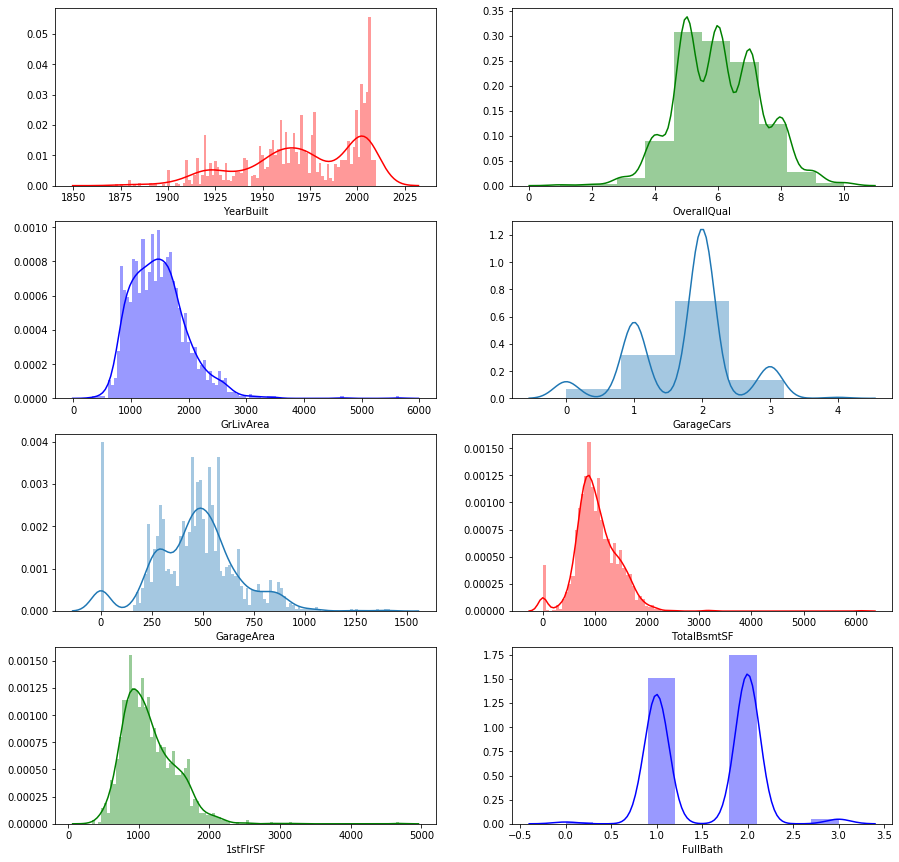

In [16]:
f, axes = plt.subplots(4, 2, figsize=(15, 15), sharex=False)
ax = sns.distplot(df["YearBuilt"], bins=100, ax = axes[0, 0], color='r')
ax = sns.distplot(df["OverallQual"], bins=10, ax = axes[0, 1], color='g')
ax = sns.distplot(df["GrLivArea"], bins=100, ax = axes[1, 0], color='b')
ax = sns.distplot(df["GarageCars"], bins=5, ax = axes[1, 1])
ax = sns.distplot(df["GarageArea"], bins=100, ax = axes[2, 0])
ax = sns.distplot(df["TotalBsmtSF"], bins=100, ax = axes[2, 1], color='r')
ax = sns.distplot(df["1stFlrSF"], bins=100, ax = axes[3, 0], color='g')
ax = sns.distplot(df["FullBath"], bins=10, ax = axes[3, 1], color='b')

# Datasets Splitting

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease, mean_loss_decrease

In [18]:
# Separate the features and target columns
X = df_new.drop(columns=["SalePrice"])
y = df_new["SalePrice"]

# Create data train and data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1145, 8), (287, 8), (1145,), (287,))

# Modeling - Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [20]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

parameter_tune = {
    'prep__numeric__poly__degree': [2, 3, 4],
    'prep__numeric__poly__interaction_only': [False, True],
    'algo__n_estimators': [220, 240],
    'algo__max_depth': [20, 50, 80],
    'algo__max_features': [0.5, 0.6, 0.8],
    'algo__min_samples_leaf': [1, 2, 3]
}

model_rf = RandomizedSearchCV(pipeline, parameter_tune, cv=3, n_iter=100,n_jobs=-1, verbose=1)
model_rf.fit(X_train, y_train)

print(model_rf.best_params_)
print(model_rf.score(X_train, y_train), model_rf.best_score_, model_rf.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.9min finished


{'prep__numeric__poly__interaction_only': True, 'prep__numeric__poly__degree': 3, 'algo__n_estimators': 240, 'algo__min_samples_leaf': 2, 'algo__max_features': 0.6, 'algo__max_depth': 80}
0.9652928738051854 0.8179438061470284 0.8534877831936465


Improving

In [21]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

parameter_tune = {
    'prep__numeric__poly__degree': [3],
    'prep__numeric__poly__interaction_only': [False, True],
    'algo__n_estimators': [260, 280],
    'algo__max_depth': [80, 100],
    'algo__max_features': [0.6, 0.8],
    'algo__min_samples_leaf': [2]
}

model_rf = GridSearchCV(pipeline, parameter_tune, cv=3, n_jobs=-1, verbose=1)
model_rf.fit(X_train, y_train)

print(model_rf.best_params_)
print(model_rf.score(X_train, y_train), model_rf.best_score_, model_rf.score(X_test, y_test))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.8min finished


{'algo__max_depth': 80, 'algo__max_features': 0.6, 'algo__min_samples_leaf': 2, 'algo__n_estimators': 280, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': True}
0.9653841437304649 0.8179215351964353 0.8537788030749961


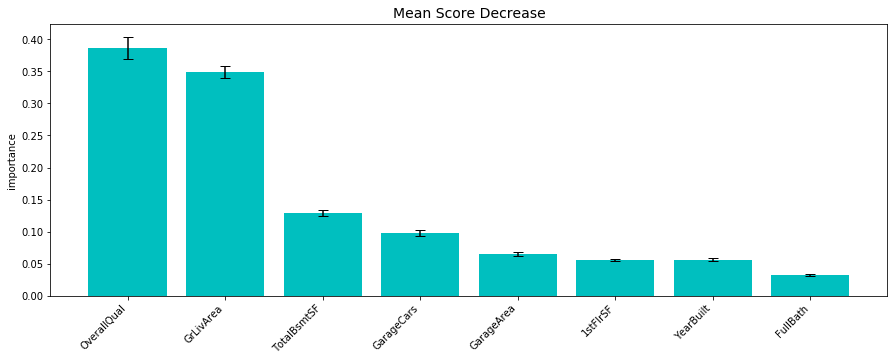

In [22]:
df_imp = mean_score_decrease(X_train, y_train, model_rf, plot=True, topk=10)

# Random Forest Model Evaluation

In [23]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual

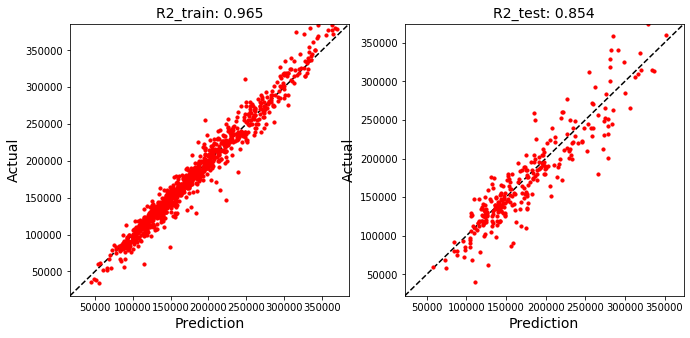

In [24]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model_rf)

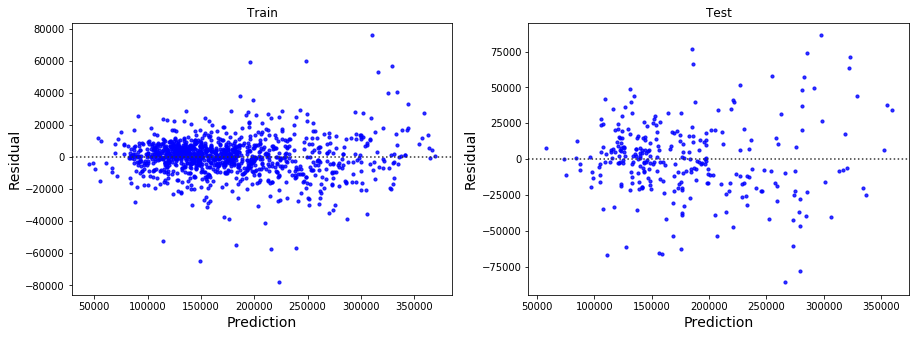

In [25]:
plot_residual(X_train, y_train, X_test, y_test, model_rf)

# Modeling - XgBoost

In [26]:
from xgboost import XGBRegressor

In [28]:
from jcopml.tuning import grid_search_params as gsp
from jcopml.tuning import random_search_params as rsp

In [33]:
gsp.xgb_poly_params

{'prep__numeric__poly__degree': [1, 2, 3],
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__max_depth': [3, 6, 10],
 'algo__colsample_bytree': [0.4, 0.6, 0.8],
 'algo__n_estimators': [100, 150, 200],
 'algo__subsample': [0.4, 0.6, 0.8],
 'algo__gamma': [1, 5, 10],
 'algo__learning_rate': [0.01, 0.1, 1],
 'algo__reg_alpha': [0.01, 0.1, 10],
 'algo__reg_lambda': [0.01, 0.1, 10]}

In [30]:
rsp.xgb_params

{'algo__max_depth': Integer(low=1, high=10),
 'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
 'algo__n_estimators': Integer(low=100, high=200),
 'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
 'algo__gamma': Integer(low=1, high=10),
 'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
 'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
 'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')}

In [32]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

parameter_tune = {
    'algo__max_depth': [100],
    'algo__colsample_bytree': [0.8],
    'algo__n_estimators': [220],
    'algo__subsample': [0.8],
    'algo__gamma': [1, 5, 10],
    'algo__learning_rate': [0.01, 0.1, 1],
    'algo__reg_alpha': [0.01, 0.1],
    'algo__reg_lambda': [0.01, 0.1, 10] 
}

model_rf = GridSearchCV(pipeline, parameter_tune, cv=3, n_jobs=-1, verbose=1)
model_rf.fit(X_train, y_train)

print(model_rf.best_params_)
print(model_rf.score(X_train, y_train), model_rf.best_score_, model_rf.score(X_test, y_test))

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  2.4min finished


[11:20:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'algo__colsample_bytree': 0.8, 'algo__gamma': 1, 'algo__learning_rate': 0.1, 'algo__max_depth': 100, 'algo__n_estimators': 220, 'algo__reg_alpha': 0.1, 'algo__reg_lambda': 10, 'algo__subsample': 0.8}
0.9991992799501183 0.7996296128775428 0.845629774801413


In [45]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

parameter_tune = {
    'prep__numeric__poly__degree': [3],
    'prep__numeric__poly__interaction_only': [True, False],
    'algo__max_depth': [100],
    'algo__colsample_bytree': [0.8],
    'algo__n_estimators': [220],
    'algo__subsample': [0.8],
    'algo__gamma': [1, 2],
    'algo__learning_rate': [0.2],
    'algo__reg_alpha': [10],
    'algo__reg_lambda': [35] 
}

model_xgb = GridSearchCV(pipeline, parameter_tune, cv=3, n_jobs=-1, verbose=1)
model_xgb.fit(X_train, y_train)

print(model_xgb.best_params_)
print(model_xgb.score(X_train, y_train), model_xgb.best_score_, model_xgb.score(X_test, y_test))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:   15.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   15.3s finished


[11:44:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'algo__colsample_bytree': 0.8, 'algo__gamma': 2, 'algo__learning_rate': 0.2, 'algo__max_depth': 100, 'algo__n_estimators': 220, 'algo__reg_alpha': 10, 'algo__reg_lambda': 35, 'algo__subsample': 0.8, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': True}
0.9988335916266262 0.7971097999373189 0.8506051711841616


# XgBoost Model Evaluation

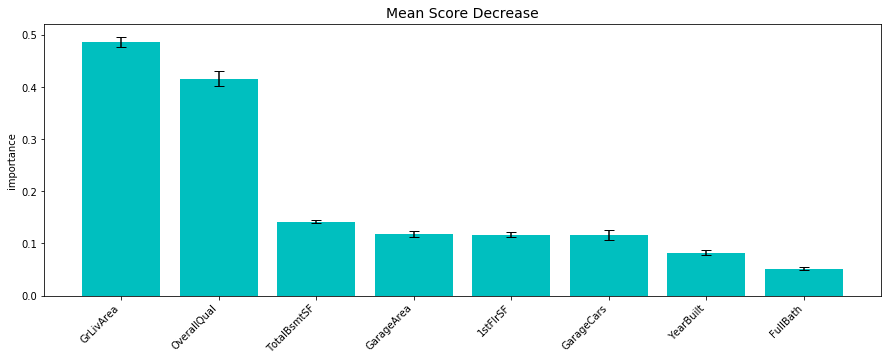

In [46]:
df_imp = mean_score_decrease(X_train, y_train, model_xgb, plot=True, topk=10)

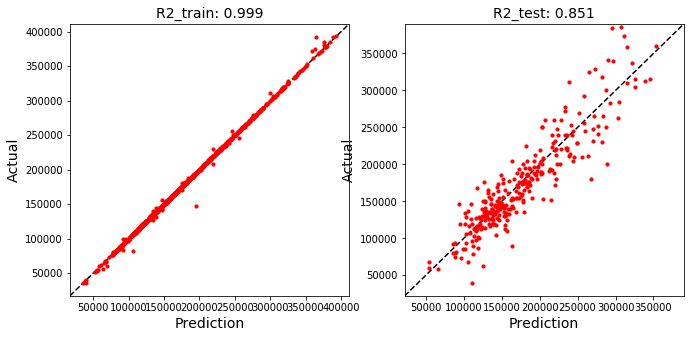

In [47]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model_xgb)

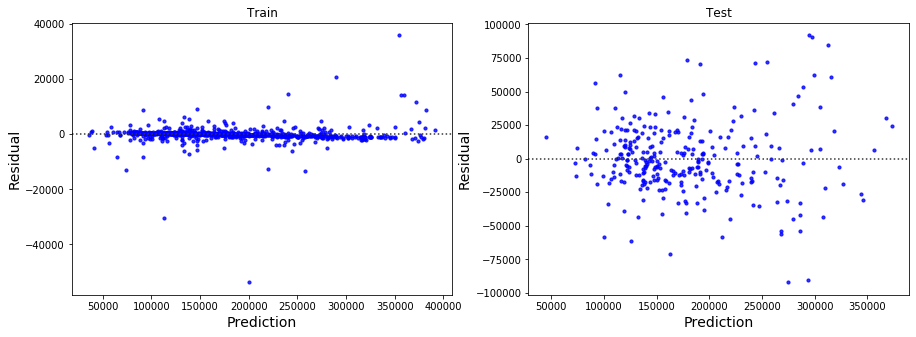

In [48]:
plot_residual(X_train, y_train, X_test, y_test, model_rf)